# **Sentiment Analysis by NLP**

We'll be using a dataset from the [Datasets for movie reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data)! This dataset is already located in the folder for this section.

### Run one time only

In [0]:
# to increase ram
'''
d=[]
while(1):
  d.append('1')
'''

"\nd=[]\nwhile(1):\n  d.append('1')\n"

### **Load Everything**

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### **Upload and Read Dataset**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.tsv to train.tsv


In [ ]:
import io
import pandas as pd

messages = pd.read_csv(io.BytesIO(uploaded['train.tsv']), delimiter='\t')

In [4]:
# for windows jupyter
messages = pd.read_csv('train.tsv', delimiter='\t')

### **Exploratery data analysis (EDA)**

In [6]:
messages.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
messages.drop(columns='PhraseId', inplace=True)

In [9]:
messages.drop(columns='SentenceId', inplace=True)

In [12]:
messages.head(5)

,message,label
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


In [11]:
messages.rename(columns={'Phrase':'message',
                          'Sentiment':'label'}, 
                 inplace=True)

In [13]:
messages.describe()

,label
count,156060.000000
mean,2.063578
std,0.893832
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


In [14]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
0        7072   7072        ugly to look at and not a Hollywood product    1
1       27273  27273                                        Same song ,    1
2       79582  79582                             of his , if you will ,    1
3       32927  32927  's incredible the number of stories the Holoca...    1
4        9206   9206  The cameo-packed , M : I-2-spoofing title sequ...    1

### **Data Visualization**

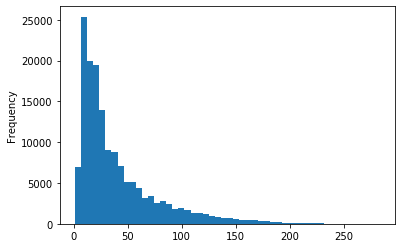

In [79]:
messages['message'].apply(len).plot(bins=50, kind='hist')

In [80]:
messages['message'].apply(len).describe()

count    156060.000000
mean         40.217224
std          38.154130
min           1.000000
25%          14.000000
50%          26.000000
75%          53.000000
max         283.000000
Name: message, dtype: float64

In [0]:
messages['length'] = messages['message'].apply(len)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4db2453748>,
      dtype=object)

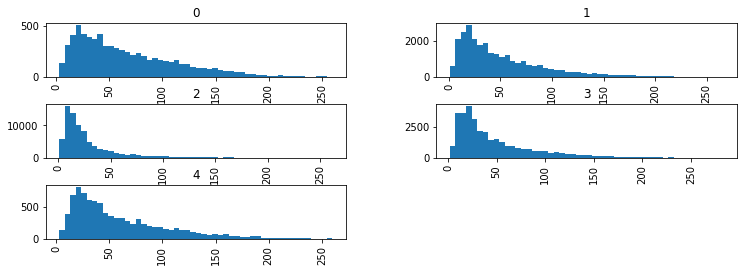

In [87]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

### **Text Pre-Processing**

In [15]:
import re

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(messages['message'])
reviews_test_clean = preprocess_reviews(messages['message'])

In [16]:
reviews_test_clean

['a series of escapades demonstrating the adage that what is good for the goose is also good for the gander  some of which occasionally amuses but none of which amounts to much of a story ',
 'a series of escapades demonstrating the adage that what is good for the goose',
 'a series',
 'a',
 'series',
 'of escapades demonstrating the adage that what is good for the goose',
 'of',
 'escapades demonstrating the adage that what is good for the goose',
 'escapades',
 'demonstrating the adage that what is good for the goose',
 'demonstrating the adage',
 'demonstrating',
 'the adage',
 'the',
 'adage',
 'that what is good for the goose',
 'that',
 'what is good for the goose',
 'what',
 'is good for the goose',
 'is',
 'good for the goose',
 'good',
 'for the goose',
 'for',
 'the goose',
 'goose',
 'is also good for the gander  some of which occasionally amuses but none of which amounts to much of a story ',
 'is also good for the gander  some of which occasionally amuses but none of which

### **Support Vector Machine Algorithm**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC


stop_words = ['in', 'of', 'at', 'a', 'the']
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3), stop_words=stop_words)
ngram_vectorizer.fit(reviews_train_clean)
X = ngram_vectorizer.transform(reviews_train_clean)
X_test = ngram_vectorizer.transform(reviews_test_clean)

X_train, X_val, y_train, y_val = train_test_split(
    X, messages['label'], train_size = 0.75
)

for c in [0.001, 0.005, 0.01, 0.05, 0.1]:
    
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))
    
# Accuracy for C=0.001: 0.5589388696655133
# Accuracy for C=0.005: 0.6057413815199282
# Accuracy for C=0.01: 0.6257080610021787
# Accuracy for C=0.05: 0.6575419710367807
# Accuracy for C=0.1: 0.6615404331667307
    


Accuracy for C=0.001: 0.5623221837754709
Accuracy for C=0.005: 0.6052543893374344
Accuracy for C=0.01: 0.6249647571446879
Accuracy for C=0.05: 0.6543637062668205
Accuracy for C=0.1: 0.6577470203767781


### **Again Splitting For further Checking**

In [0]:
Review_X_train,review_x_test, Label_X_val, label_y_val = train_test_split(
    reviews_test_clean, messages['label'], train_size = 0.75
)

In [58]:
Review_X_train[:3], Label_X_val[:3], review_x_test[:3], label_y_val[:3]

(['sociopathy',
  "this one is a few bits funnier than malle 's dud  if only because the cast is so engagingly messing around like slob city reductions of damon runyon crooks ",
  'their surroundings'],
 ['without becoming one itself',
  'for having the guts to confront it',
  'too extreme for tv rendition'],
 124014    2
 130180    3
 38217     3
 Name: label, dtype: int64,
 103373    2
 141797    2
 78073     2
 Name: label, dtype: int64)

### **Term Frequency-Inverse Document Frequency model (TFIDF)**

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(Review_X_train)
#transformed test reviews
tv_test_reviews=tv.transform(review_x_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (117045, 17097)
Tfidf_test: (39015, 17097)


### **Bags of words model (Count Vectorizer)**

In [63]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(Review_X_train)
#transformed test reviews
cv_test_reviews=cv.transform(review_x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names


BOW_cv_train: (117045, 17097)
BOW_cv_test: (39015, 17097)


### **Logistic Regression Model**

In [64]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,Label_X_val)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews, Label_X_val)
print(lr_tfidf)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [65]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]


In [67]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(label_y_val,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(label_y_val,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.5197744457260028
lr_tfidf_score : 0.510880430603614


### **Multinomial Naive Bayes**

In [68]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,Label_X_val)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,Label_X_val)
print(mnb_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [69]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]


In [71]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(label_y_val,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(label_y_val,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.5198513392285019
mnb_tfidf_score : 0.5109316929386134


### **Final Model with SVM**

In [18]:
final = LinearSVC(C=0.01)
final.fit(X, messages['label'])
print ("Final Accuracy: %s" 
       % accuracy_score(messages['label'], final.predict(X_test)))

# Final Accuracy: 0.7057477893118032

Final Accuracy: 0.705760604895553


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

### **Top Positive and Negetive**

In [17]:
feature_to_coef = {
    word: coef for word, coef in zip(
        ngram_vectorizer.get_feature_names(), final.coef_[0]
    )
}

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:10]:
    print (best_positive)
    
print("\n\n")
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:10]:
    print (best_negative)

('worst', 0.6150439479026035)
('awful', 0.5537510084344501)
('stupid', 0.5264276794370235)
('bad', 0.48051485728993226)
('terrible', 0.45874391687135413)
('waste', 0.4574669354805161)
('dull', 0.43498631081601336)
('mess', 0.41636589496192644)
('ugly', 0.39753496858485504)
('unfunny', 0.3970731396231451)



('not bad', -0.1631922436537078)
('too bad', -0.15204359694673694)
('while', -0.12352233605980303)
('though', -0.11957393069817218)
('but', -0.11855480240425631)
('although', -0.11117196359267485)
('bad boy', -0.11023789152460717)
('never dull', -0.10497046880262166)
('somewhat', -0.09537557699094484)
('hilarious', -0.09265767758344304)


### **Predict String**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = ['in', 'of', 'at', 'a', 'the']
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3), stop_words=stop_words)

In [25]:
final.predict(ngram_vectorizer.transform(['this is not good', 'this is not a good movie']))

array([1, 1], dtype=int64)

### Save and Load by pickle

Load Count Vectorize

In [1]:
import pickle
filename = 'cvectorize.sav'

In [29]:
# save the vectorize to disk

#pickle.dump(ngram_vectorizer, open(filename, 'wb'))

In [2]:
# load the model from disk
loaded_vect = pickle.load(open(filename, 'rb'))

Load Model to Predict

In [3]:
import pickle
filename = 'sentiment.sav'

In [24]:
# save the model to disk

#pickle.dump(final, open(filename, 'wb'))

In [4]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

Time to Predict

In [7]:
loaded_model.predict(loaded_vect.transform(['this is super good', 'this is not bad']))

array([3, 2], dtype=int64)

### **Finding** **Error**

In [0]:
y_pred = svm.predict(X_val)

In [39]:
mse = ((y_pred - y_val) ** 2).mean()

mse

0.4222478533897219

In [41]:
from math import sqrt
rmse = sqrt(mse)
rmse

0.6498060121218654